# Sentiment Analysis for Product Reviews

## Introduction

Sentiment Analysis also known as Opinion Mining refers to the use of natural language processing, text analysis to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

In this project, we will delve into the world of natural language processing and sentiment analysis. We will work with a dataset of product reviews to analyze and classify the sentiment of each review as positive, negative or neutral. This project aims to enhance  understanding of text analysis and machine learning for sentiment classification.

The following sections go into details of the project. We begin the project my importing necessary libraries needed.


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

**Loading the data**

First, we need to load the dataset into a Pandas DataFrame. This will allow us to manipulate and analyze the data easily

In [2]:
# load the dataset
data = pd.read_csv("Amazon Product Review.txt")

# display first few rows of the data
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


**Understanding the structure of the data**

After loading the data, it is crucial to get a sense of its structure, including columns available and their data types. This information helps us understand the types of data, e.g. numerical, categorical, we are dealing with and is crucial for deciding how to preprocess the data

In [3]:
# get a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [4]:
# get statistical summary for numerical columns
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


**Handling missing values**

Missing values can significantly impact the performance of your model. Let's check for missing values and addres them.

In [5]:
# checking for missing values in each column
data.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

**Handling Duplicates**

Duplicates can skew your analysis, so let's remove any duplicate entries.

In [6]:
# check for duplicates

data.duplicated().sum()

0

We can see that there are no missing values and duplicate rows, so there is no action to take. We move on.

## Exploratory Data Analysis

Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in this project, as it allows us to understand the data you're working with and uncover any underlying patterns or insights. For sentiment analysis, EDA can reveal how sentiments are distributed across your dataset and whether any features, such as review length, correlate with sentiment.

**Percentage of ratings**

We calculate the percentage of each rating in the star_rating column of the dataset. The result is stored in the variable rating_percent.

In [13]:
# calculate the percentage of ratings
rating_percent = (data['star_rating'].value_counts() / len(data))
rating_percent

5    0.648998
4    0.186345
3    0.071841
1    0.055372
2    0.037444
Name: star_rating, dtype: float64

The output shows that the majority of reviews have a 5-star raring (~64.9%).

**Exploring the distribution of ratings**

Understanding the distribution of ratings can give insights into our user sentiment and the balance of the dataset.

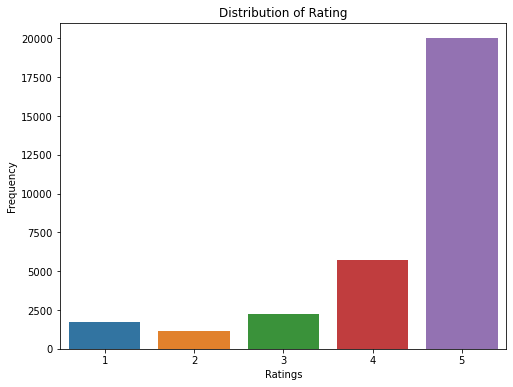

In [10]:
# visualizing the distribution of ratings 
plt.figure(figsize=(8,6))
sns.countplot(x='star_rating', data=data)
plt.title('Distribution of Rating')
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

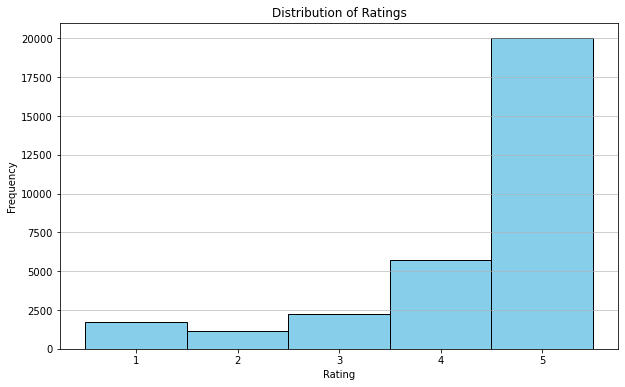

In [11]:
# Ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(data['star_rating'], bins=range(1, 7), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming ratings are integers from 1 to 5
plt.grid(axis='y', alpha=0.75)
plt.show()


From the visualization, we can see that that most of the ratings are 4 and 5, which tells us that the overall sentiment bias of the dataset is positive.

**Analyze the length of review and its correlation with sentiments**

Review length can sometimes correlate with sentiment; for instance, longer reviews might be more detailed and either more positive or more negative. You can calculate the length of each review and then plot this against the ratings to see if there's any noticeable trend.

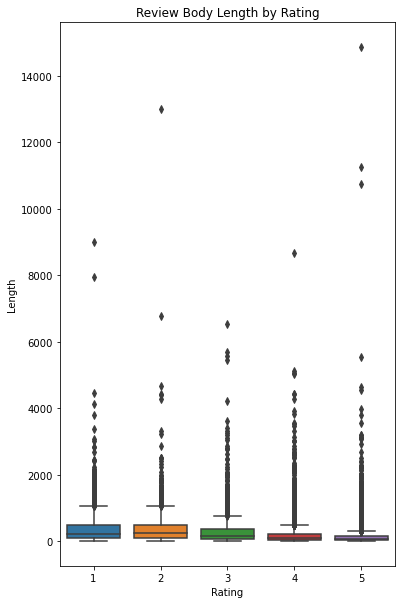

In [14]:
# calculate review length for review body 
data['body_length'] = data['review_body'].apply(len)

# visualizing
plt.figure(figsize=(6, 10))
sns.boxplot(x='star_rating', y='body_length', data=data)
plt.title('Review Body Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Length')
plt.show()

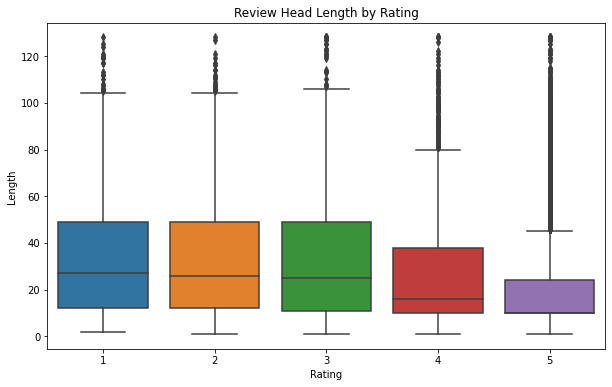

In [15]:
# calculate review length for review headline 
data['head_length'] = data['review_headline'].apply(len)

# visualizing
plt.figure(figsize=(10, 6))
sns.boxplot(x='star_rating', y='head_length', data=data)
plt.title('Review Head Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Length')
plt.show()

From the box plot, we can infer that there is a correlation between the sentiment , as indirectly indiacted by the rating, and the lenght of reviews. We find that negative reviews (lower ratings) are longer, possibly because customers provide more detail when they're dissatisfied. Conversely, you discover that positive reviews are either succinct or equally detailed (outliers), reflecting varied user behavior

We can see that the ratins from 1 - 3 have tend to be longer on average and ratings 4-5 tend to be shorter on average. Though, there are outliers whose reviews are significantly longer than most of the other reviews in that rating category. From the symmentry of the boxes and the placement of the median line, we can see thta the review lenghts are skewed towards shorter or longer reviews in each rating category.

## Data Preprocessing

Data preprocessing is a critical step in any data science project, especially in text analysis or natural language processing tasks like sentiment analysis. It involves cleaning and preparing your text data to improve the performance of your machine learning models. Here’s a broad overview of what data preprocessing might entail for your sentiment analysis project: This will involve steps like text cleaning, tokenization, and normalization (stemming or lemmatization, depeding on our need)

**Merging Review columns**

Before we clean our text, we will merge the 'review_headline' and 'review_body' columns into a 'full_review' to get a full context of the sentiment being expressed.

After merging, proceed with the text cleaning steps on the "full_review" column. This approach ensures that both the summarized sentiment in the head and the detailed expression in the body are considered in your analysis.

In [16]:
# Merging the 'review_headline' and 'review_body' columns
data['full_review'] = data['review_headline'] + " " + data['review_body']

Now we can proceed with cleaning the 'full_review' column as the primary text source

### Text Cleaning

Text cleaning typically involves several steps to remove unnecessary elements and standardize your text data.

 - **Lowercasing Text**

Converting all text to lowercase ensures consistency and helps in the process of comparison and analysis since "Word" and "word" will be treated the same. We convert to lower case and store in the 'review' column

 - **Removing punctuation and special characters**

Punctuation and special characters can be removed as they usually don't carry sentiment and might increase the complexity of the data.

This cleaning step will remove characters like these: !"#$%&'()*+,-./:;<=>?@[]^_`{|}~


 - **Removing numbers**

Unless numbers are relevant to your analysis (e.g., product models, quantities that might affect sentiment), it's often useful to remove them.

 - **Removing  Stop words**

Stop words (common words that usually don't carry much meaning, like "the", "is", etc.) can be removed to focus on more significant words. This step requires the nltk or spaCy library for a list of stop words.

 - **Handlig emojis**

If your dataset contains emojis,we decide on how to handle them. We can translate emojis to text using a library like emoji to retain their sentiment value.


In [19]:
# converting all text to lowercase
data['review'] = data['full_review'].str.lower()

import string
# removing punctuation and special characters
data['review'] = data['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# removing numbers from review column
data['review'] = data['review'].str.replace('\d+', '', regex=True)

# removing stopwords
# import required library
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# handling emojis
import emoji
data['review'] = data['review'].apply(emoji.demojize)
data['review'] = data['review'].replace(':', ' ', regex=True).replace('_', ' ', regex=True)  # Replace underscores and colons if you want



After applying these cleaning steps, your dataset should be in a much cleaner state, ready for further preprocessing like tokenization and vectorization. Remember, the specific steps and their order might vary based on your dataset and the goals of your analysis. Always inspect the text before and after cleaning to ensure the process is achieving the desired outcome.

### Normalization

Normalization in the context of natural language processing (NLP) refers to the process of converting text into a more uniform format to facilitate analysis and processing. This step aims to reduce the complexity of the text data and improve the performance of machine learning models by focusing on the essential aspects of the text.  

 - **Stemming:** Reducing words to their root form, though this might result in non-actual words but can help in reducing the complexity of the text data.

 - **Lemmatization:** Similar to stemming but ensures the root word belongs to the language. This is preferred when the actual words (lemmas) are required for the analysis.

Lemmatization involves converting words in the text to their base or root form. Lemmatization takes into consideration the context and part of speech of a word, making it more sophisticated and accurate than stemming, which simply chops off word endings. Lemmatization helps in reducing the complexity of the text data by ensuring that different forms of a word are treated as the same term, thereby reducing the total number of unique words that algorithms need to handle.

We will lemmatize our data review. This column will store the text of the review after lemmatization, where each word is replaced by its lemma.

In [22]:
# lemmatize the dataset using spacy

import spacy
nlp = spacy.load("en_core_web_sm")

# function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

# Apply lemmatization to the 'review' column and store in a new column
data['lemmatized_review'] = data['review'].apply(lemmatize_text)

### Tokenization

Tokenization is a fundamental step in most Natural Language Processing (NLP) tasks. It involves breaking down a piece of text into smaller units called tokens. These tokens can be words, phrases, symbols, or any meaningful elements in the text. The process of tokenization makes it easier to analyze and interpret the text by reducing it to its basic components.

 - **Using SpaCy for tokenization**

paCy is a powerful library for NLP in Python. Since SpaCy is installed and we have downloaded the English model, we go ahead to tokenize our text with spaCy.

This approach also adds a tokens column to your DataFrame, where each row contains the tokens from the review column, using spaCy's tokenizer.

In [23]:
# import spacy library
import spacy

# function to tokenize 
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Apply tokenization to the lemmatized text
data['tokens'] = data['lemmatized_review'].apply(tokenize_text)

## Sentiment Labelling

For our sentiment labelling, First, you'll need a function that takes a numerical rating and returns a sentiment label based on the rating value. Map the existing ratings to sentiment labels ( 4 or 5 stars as positive, 1 or 2 stars as negative, 3 stars as neutral) 

Next, we apply this function to the column in the DataFrame that contains the ratings. This will create a new column 'label' in the dataframe with sentiment labels.

In [24]:
# sentiment label function

def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to rating column to create a label column.
data['label'] = data['star_rating'].apply(label_sentiment)


## Data Visualization

Create visualizations such as word clouds and frequent words plot to understand the common words and themes in your dataset and frequency plot.

### Word Cloud 

Word clouds are useful for visualizing the most frequent words in your dataset. They can help identify dominant themes or terms in your cleaned data.

Adding a word cloud to your work can provide insightful visualizations of the most common words found in your dataset, especially for sentiment analysis projects. Word clouds visually emphasize words that appear more frequently in your dataset: the larger the word's font size, the more often it appears. 

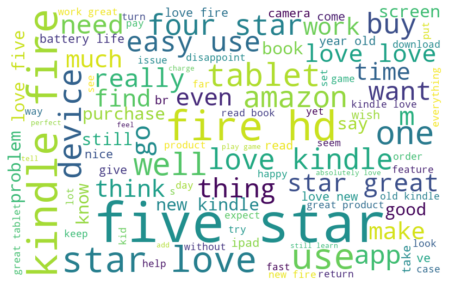

In [20]:
from wordcloud import WordCloud

# Join all reviews into one text
txt = ' '.join(review for review in data.lemmatized_review)

# Generate a word cloud
wordcloud = WordCloud(
    background_color='white',
    max_font_size=100,
    max_words=100,
    width=800,
    height=500
).generate(txt)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Frequency Plot

Word frequency plot is a great alternative to visualize the most common words in your text data. It can provide insights into the main topics or sentiments expressed in your dataset

In [27]:
# Count word frequency 

from collections import Counter

# Concatenate all the processed text into a single list
words = sum(data['lemmatized_review'].apply(lambda x: x.split()), [])

# Count the words
word_counts = Counter(words)

# Most common words
most_common_words = word_counts.most_common(20)  # Adjust the number as needed


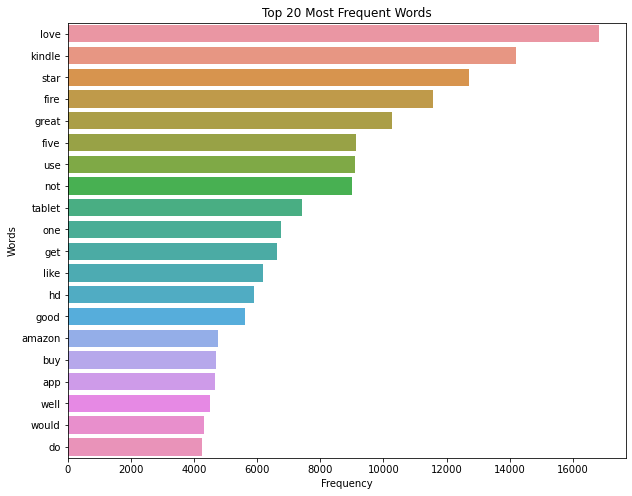

In [28]:
# create the plot

# Unzip the words and their counts
words, counts = zip(*most_common_words)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(words))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words')
plt.show()


## Text Vectorization

Text vectorization is a crucial step in natural language processing (NLP) that converts text data into numerical or vector form, making it possible to perform machine learning on text. There are several methods for text vectorization, with Bag of Words (BoW), TF-IDF (Term Frequency-Inverse Document Frequency), and word embeddings being among the most common. 

We will use the TF-IDF method for our text vectorization.

**TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF accounts for the frequency of a word in a document relative to its frequency across all documents, helping to highlight words that are more interesting, e.g., frequent in a document but not across documents.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer 
tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized_review'])

# 'X_tfidf' now contains the TF-IDF vectorized representation of your text data

## Model Building

**Feature extraction**

We implemted the TF-IDF method for feature extraction.

**Choosing a Model**
Support Vector Machines (SVM) for text classification is a strong choice, especially due to its effectiveness in high-dimensional spaces, such as those you encounter in text data. SVM works well for both linearly separable and non-linearly separable datasets, thanks to the kernel trick, which allows it to find the optimal hyperplane in a transformed feature space.

In [5]:
# import necesary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

**Data Splitting**

Before training, ensure your data is split into training and testing sets. This is crucial for evaluating your model's performance objectively.

You've already preprocessed your data and converted it into TF-IDF vectors, so you should have your X_tfidf ready and your target labels in y. The next step is to split this data into training and testing sets.

In [6]:
# Your vectorized text data (features)
x = X_tfidf  # X_tfidf is your TF-IDF vectorized data

# Your labels (target variable)
y = data['label']  

# Split the data into training and testing sets
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Handling Imbalance**

Handling imbalanced text data is crucial for building robust and fair machine learning models, especially in classification tasks. An imbalanced dataset can lead to models that are biased towards the majority class, resulting in poor performance on the minority class(es). 

Using SMOTE (Synthetic Minority Over-sampling Technique) involves generating synthetic samples for the minority class(es) in your dataset to balance the class distribution. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line.

Applying SMOTE to text data typically requires a preliminary step of converting the text data into a numerical format, as SMOTE operates on numerical data. Since you're working with text data, you'd first vectorize your text using techniques such as TF-IDF or word embeddings, and then apply SMOTE on the vectorized data.


Once you have your numerical data, you can apply SMOTE. Ensure your dataset is split into the feature matrix `X` and the target vector `y` before applying SMOTE, as SMOTE will synthetically sample your feature space.


In [10]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(x_train, y_train)


**Model Training**

After applying SMOTE, you can train your model on the balanced dataset `x_sm` and `y_sm`.


In [11]:
# initialize and trian svm model

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(x_sm, y_sm)


SVC(kernel='linear', random_state=42)

The C parameter controls the trade-off between smooth decision boundary and classifying training points correctly; a large value of C gives you low bias and high variance, and vice versa.T

**Model Prediction**

After the model is trained, we make predictions on the test set

In [12]:
# predict on te testing data
y_pred = svm_model.predict(x_test) 

In [13]:
# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.58      0.74      0.65       572
     neutral       0.41      0.57      0.48       446
    positive       0.98      0.91      0.94      5152

    accuracy                           0.87      6170
   macro avg       0.66      0.74      0.69      6170
weighted avg       0.90      0.87      0.88      6170



**Model Evaluation**


Evaluate your model’s performance, paying close attention to how it performs across different classes. Use metrics that account for class imbalances, like precision, recall, F1-score, and confusion matrices.

Model Evaluation:
   - Evaluate the model's performance on the testing set using appropriate metrics (accuracy, precision, recall, F1-score).
   - Analyze the confusion matrix to understand where the model excels or struggles.
   - Fine-tune the model parameters if necessary.

Evaluate your model using appropriate metrics. For classification tasks, common metrics include accuracy, precision, recall, F1 score, and sometimes more sophisticated metrics like AUC-ROC for binary classification tasks.

Now, evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score. Additionally, analyze the confusion matrix to get insights into the types of errors your model is making.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))  # Use 'micro' or 'weighted' for multi-class
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Display the classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8724473257698542
Precision: 0.6569157984287287
Recall: 0.7432177679667443
F1-Score: 0.6920780473860296
              precision    recall  f1-score   support

    negative       0.58      0.74      0.65       572
     neutral       0.41      0.57      0.48       446
    positive       0.98      0.91      0.94      5152

    accuracy                           0.87      6170
   macro avg       0.66      0.74      0.69      6170
weighted avg       0.90      0.87      0.88      6170

Confusion Matrix:
 [[ 425  105   42]
 [ 114  256   76]
 [ 190  260 4702]]


The model has an accuracy of approximately 87% which is a good score.